# Ejemplo de proyecto de ML

Para todo proyecto de machine learning conviene seguir los pasos siguientes:

1. Determinar que problema queremos resolver, cual es la pregunta que queremos responder.
2. Obtener los datos y limpiarlos.
3. Explorar los datos mediante visualizaciones y sumarios.
4. Preparar los datos para los métodos que pensamos probar (escalar, normalizar, binning, one-hot encoding, etc).
5. Probar los distintos modelos y seleccionar los mejores.
6. Ajustar los (hiper)parámetros para tener los mejores resultados. También podemos combinar distintos modelos en un ensamble.
7. Presentar los resultados.

## Objetivo

Nos interesa predecir el precio de las casas en el estado California. Para eso vamos a usar datos del censo de 1990 que incluye mediciones de población, ingreso, y precio mediano de las casas para cada bloque censal (un bloque censal es una unidad geográfica utilizada por la oficina de censo de Estados Unidos, típicamente tiene entre 600 y 3000 habitantes).

### Scoring

Para evaluar nuestras predicciones, vamos a usar [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

## Data

https://github.com/ageron/handson-ml/tree/master/datasets/housing

> This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Datos habitacionales de California del censo de 1990.

Atributos:
- latitud
- longitud
- mediana de la antigüedad de las casas
- número total de habitaciones
- número total de dormitorios
- población
- casas
- mediana del ingreso
- mediana del valor de las casas
- proximidad al océano

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

In [3]:
df = pd.read_csv('data/housing.csv')

In [4]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Tenemos 9 variables numéricas y una categórica: `ocean_proximity`, que clasifica los grupos entre los que están cerca del océano, cerca de la Bahía, en el interior del estado o en una isla.

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

También vemos que hay datos faltantes en la columna `total_bedrooms`.

In [8]:
df['total_bedrooms'].isna().sum()

207

In [9]:
df[df['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

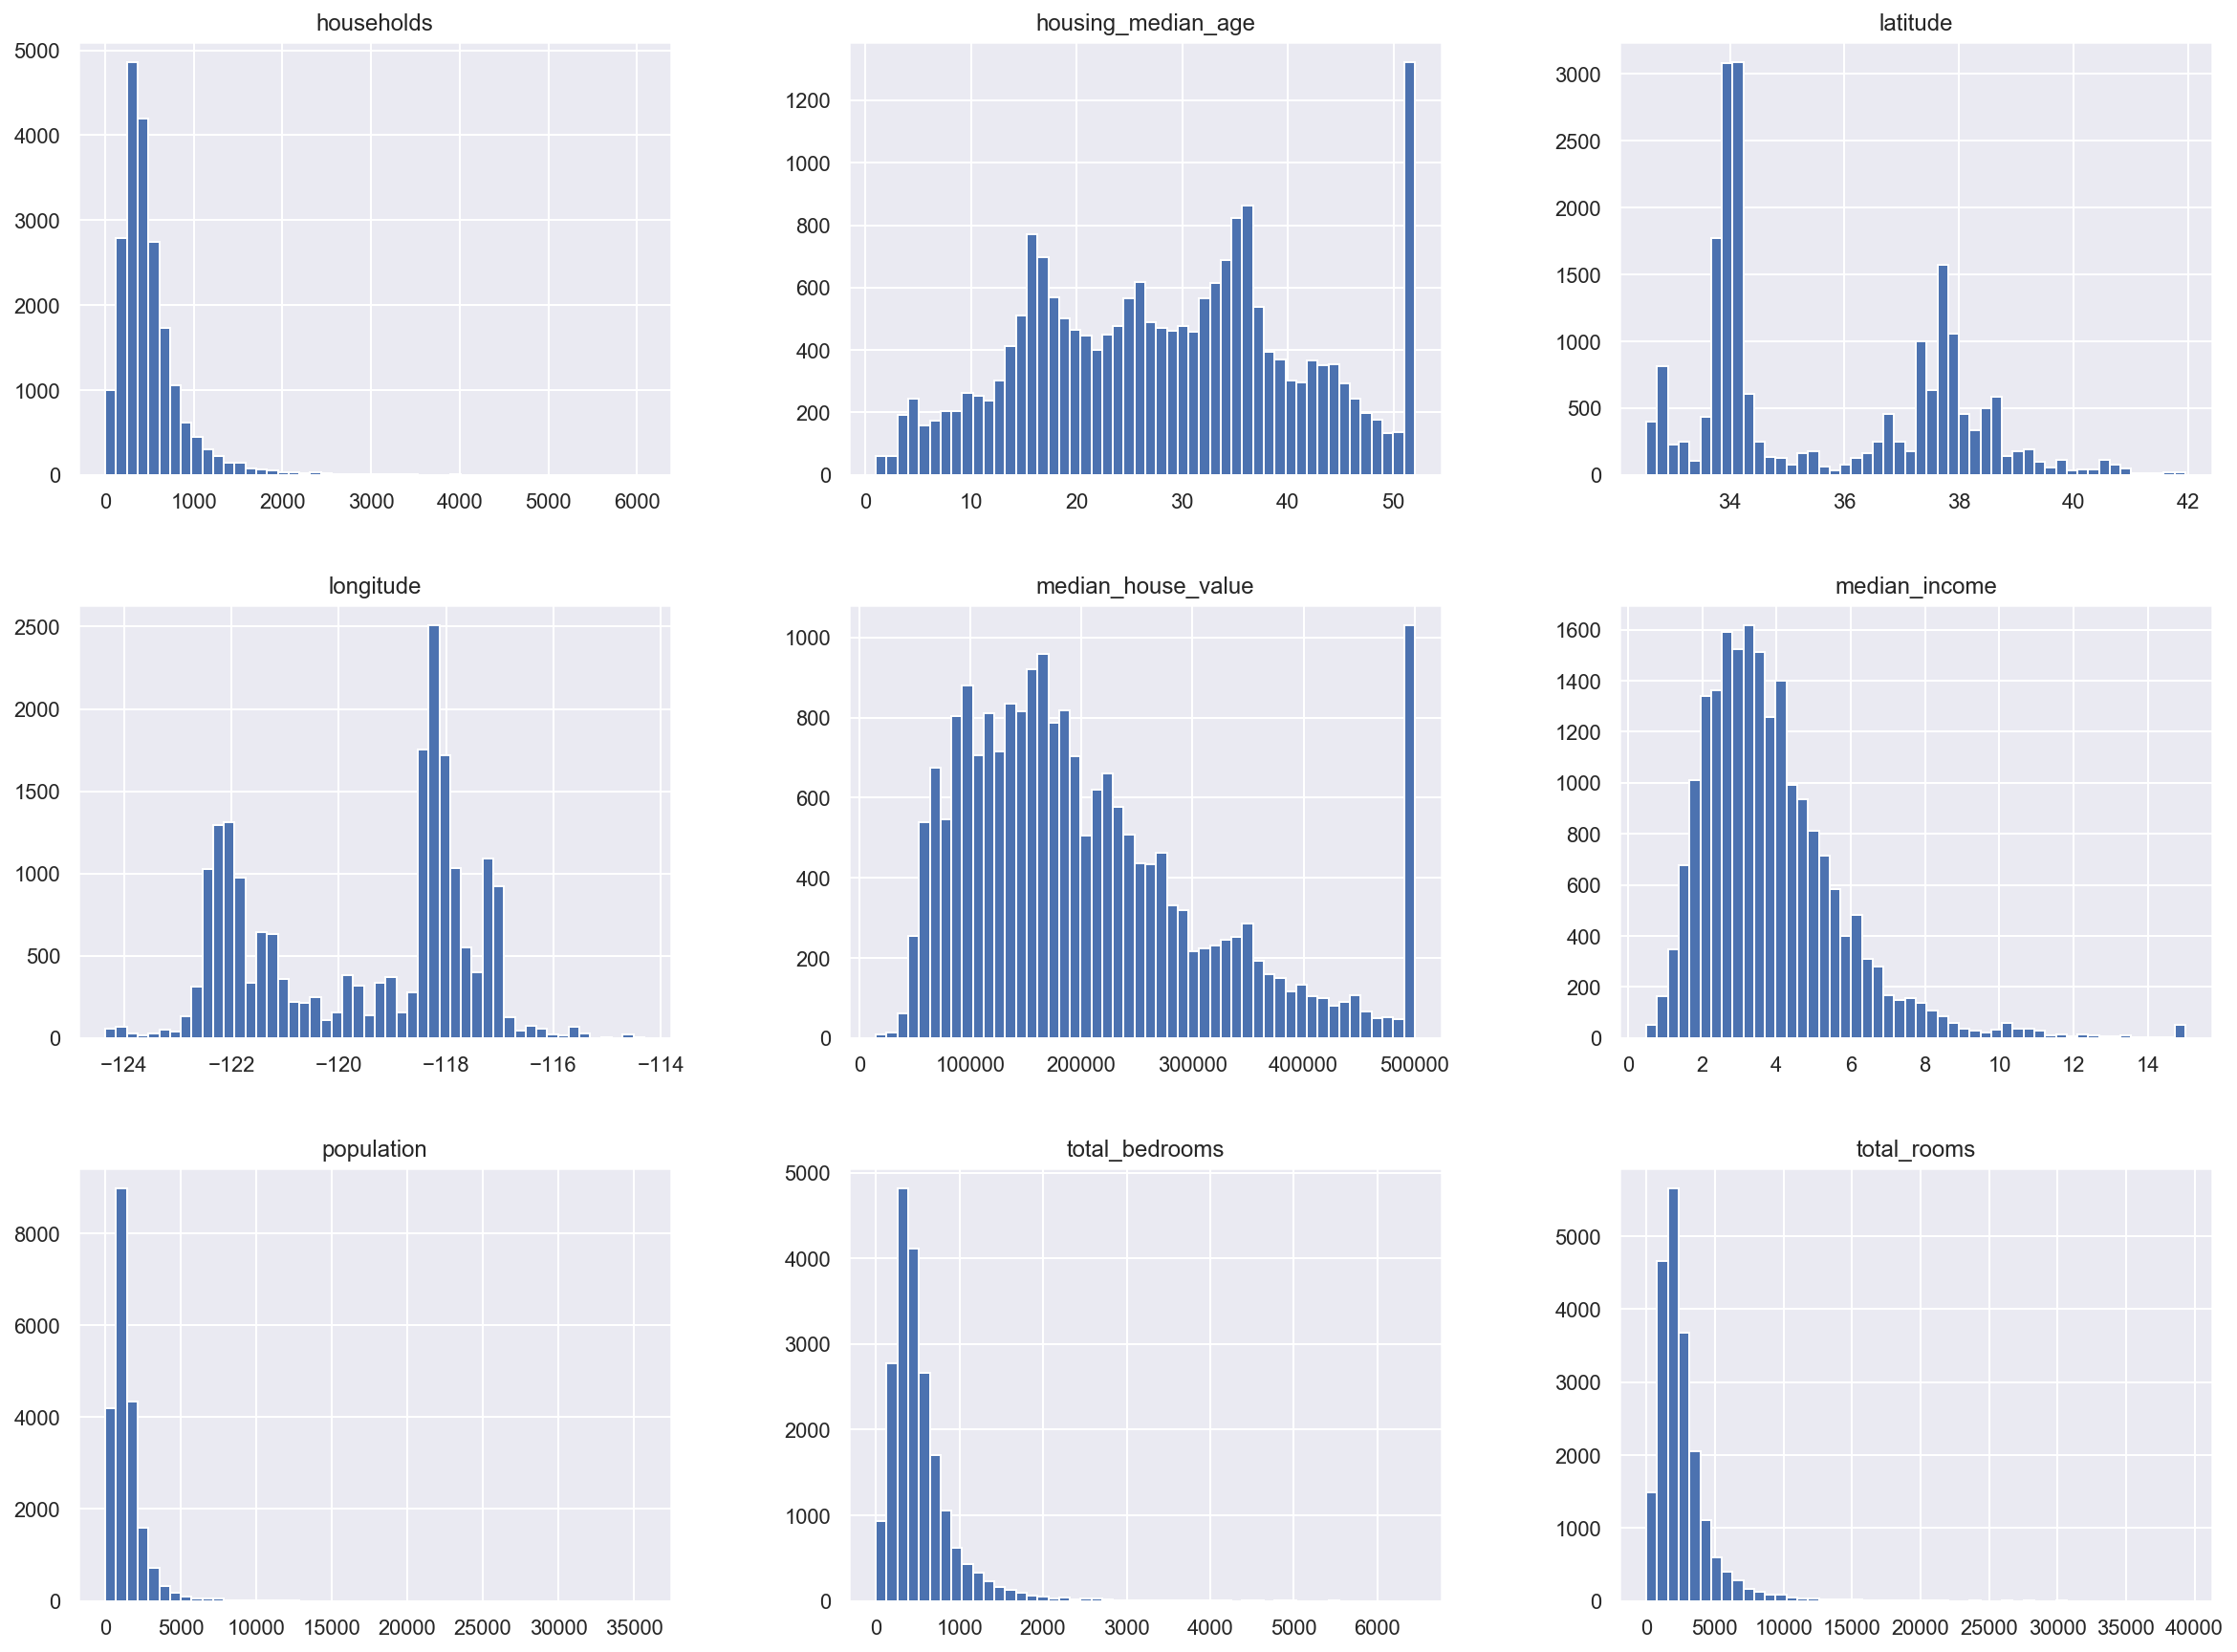

In [11]:
df.hist(bins=50, figsize=(20,15));

Notar que el ingreso promedio (*median income*) claramente no está expresado en dólares. El valor está preprocesado de manera que el máximo es $15$ para los ingresos más altos y el mínimo $0.5$ para los más bajos.

La edad y el valor de casa promedio tienen "cortados" sus valores máximos (i.e todo valor promedio de casa superior a $500.000$ aparece como $500.000$). Esto podría ser un problema si uno quiere predicciones precisas para valores mayores a $500.000$.

Muchos histogramas tienen *colas* muy largas. Algunos métodos de ML funcionan mejor si los atributos tienen una forma más normal (campana de Gauss), así que es posible que los transformemos.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5]) 

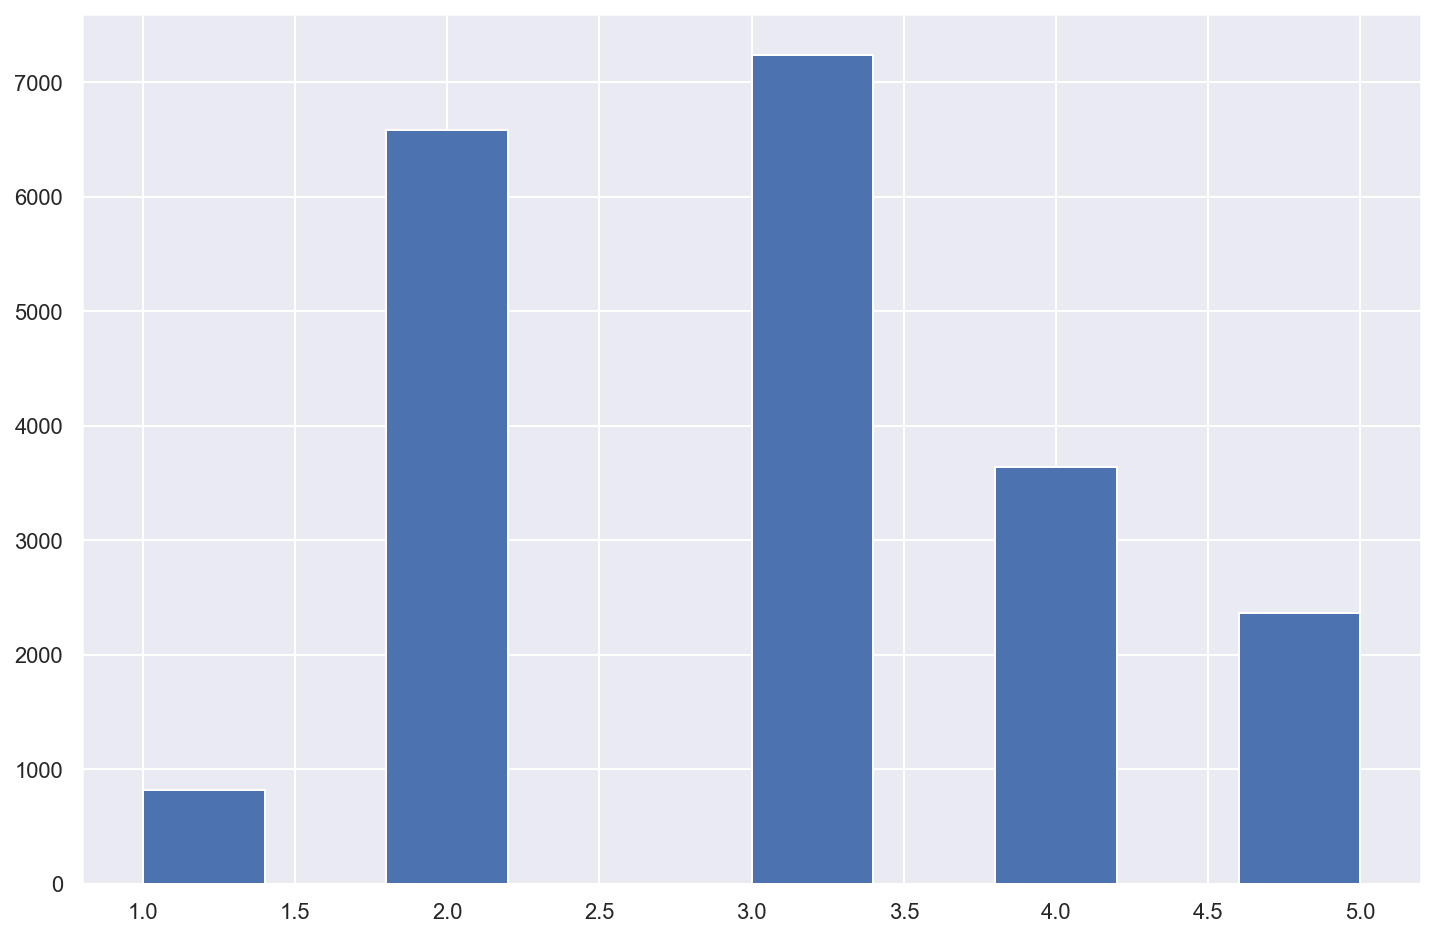

In [14]:
df["income_cat"].hist();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


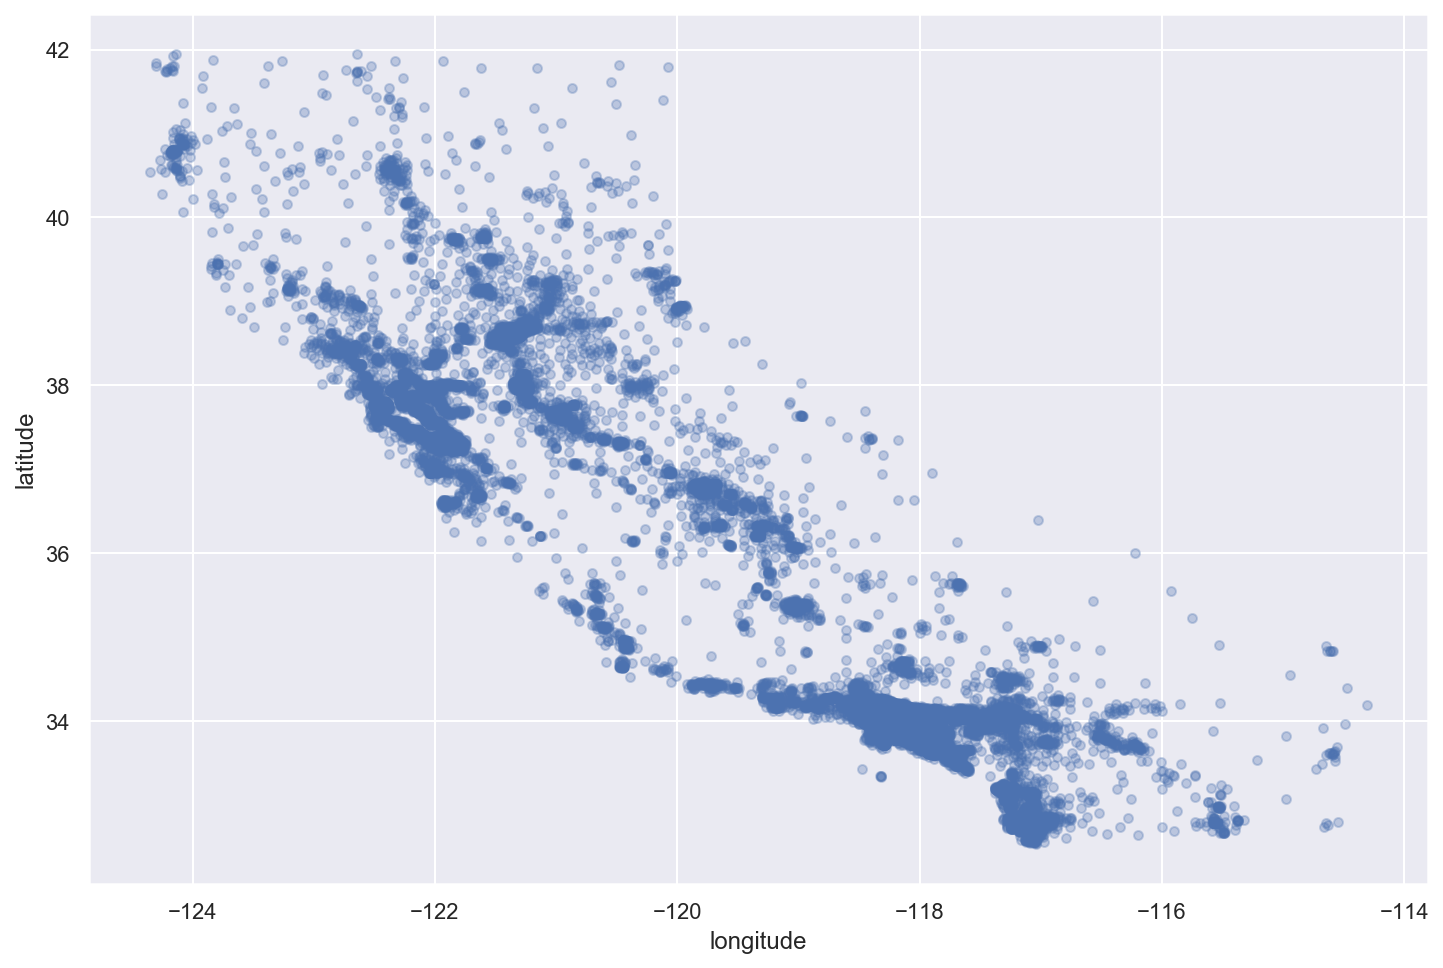

In [15]:
df.plot(kind="scatter", x="longitude",y="latitude", alpha=0.3);

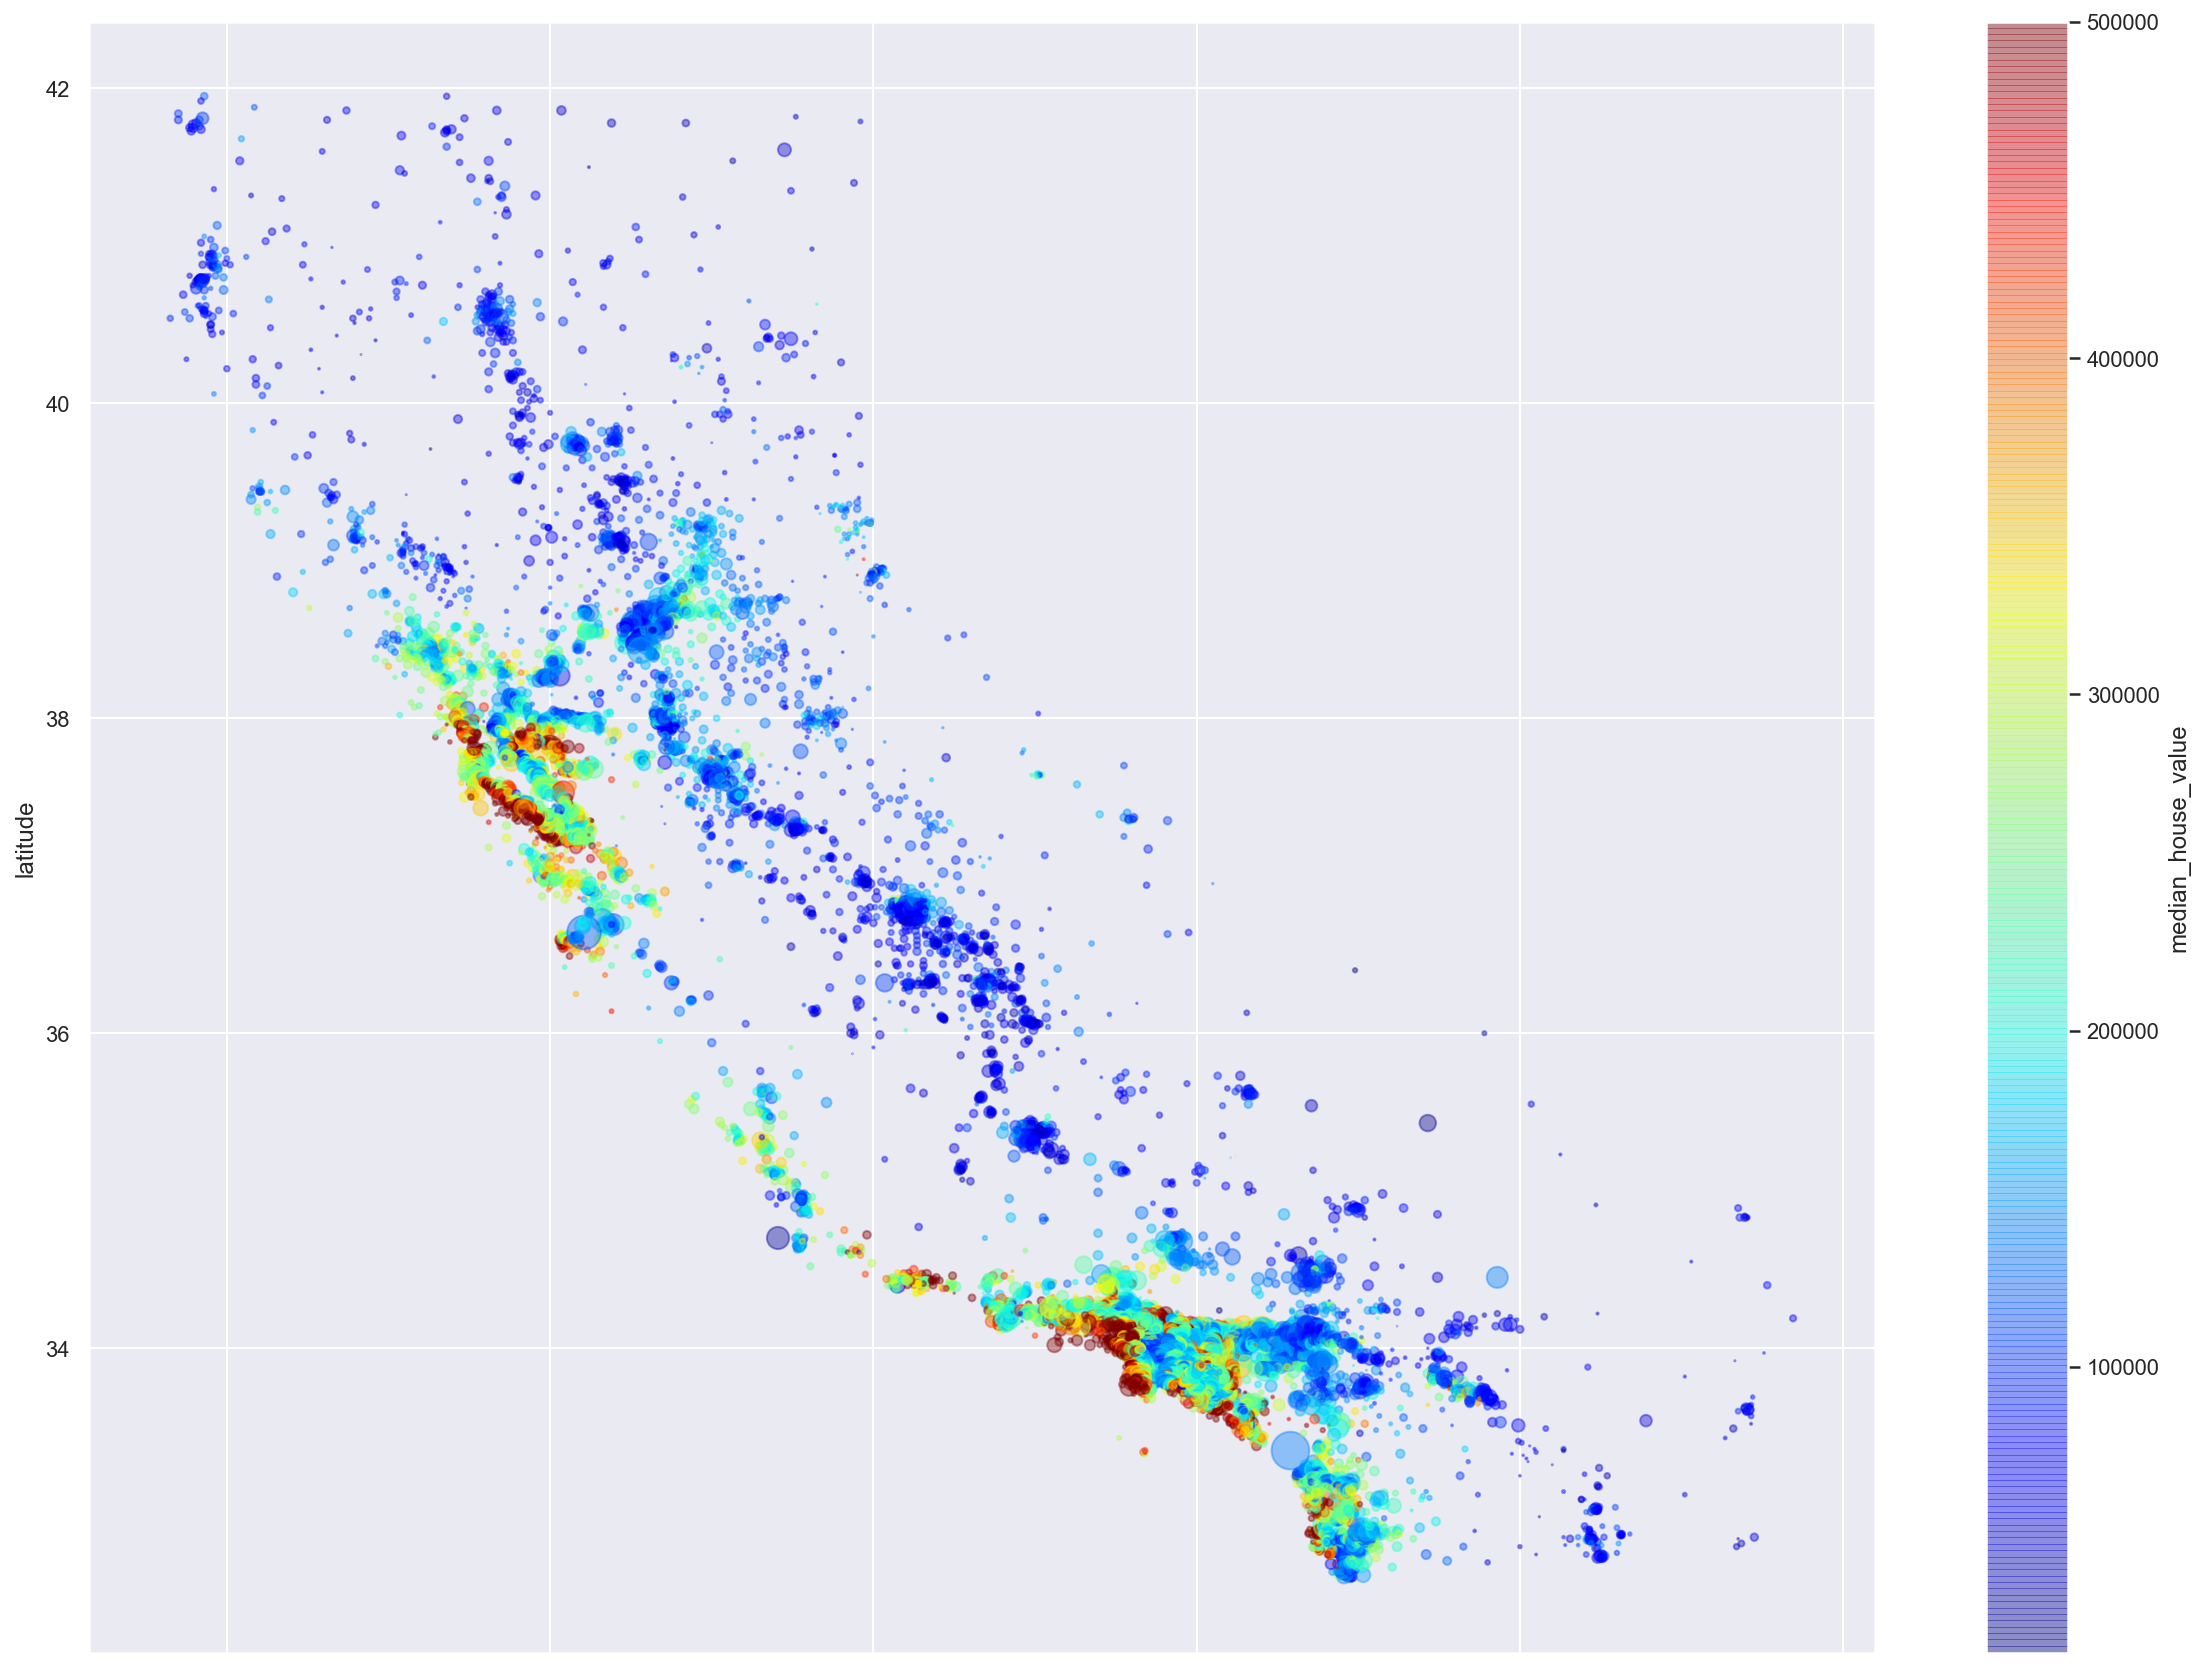

In [16]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, figsize=(20,15),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True);

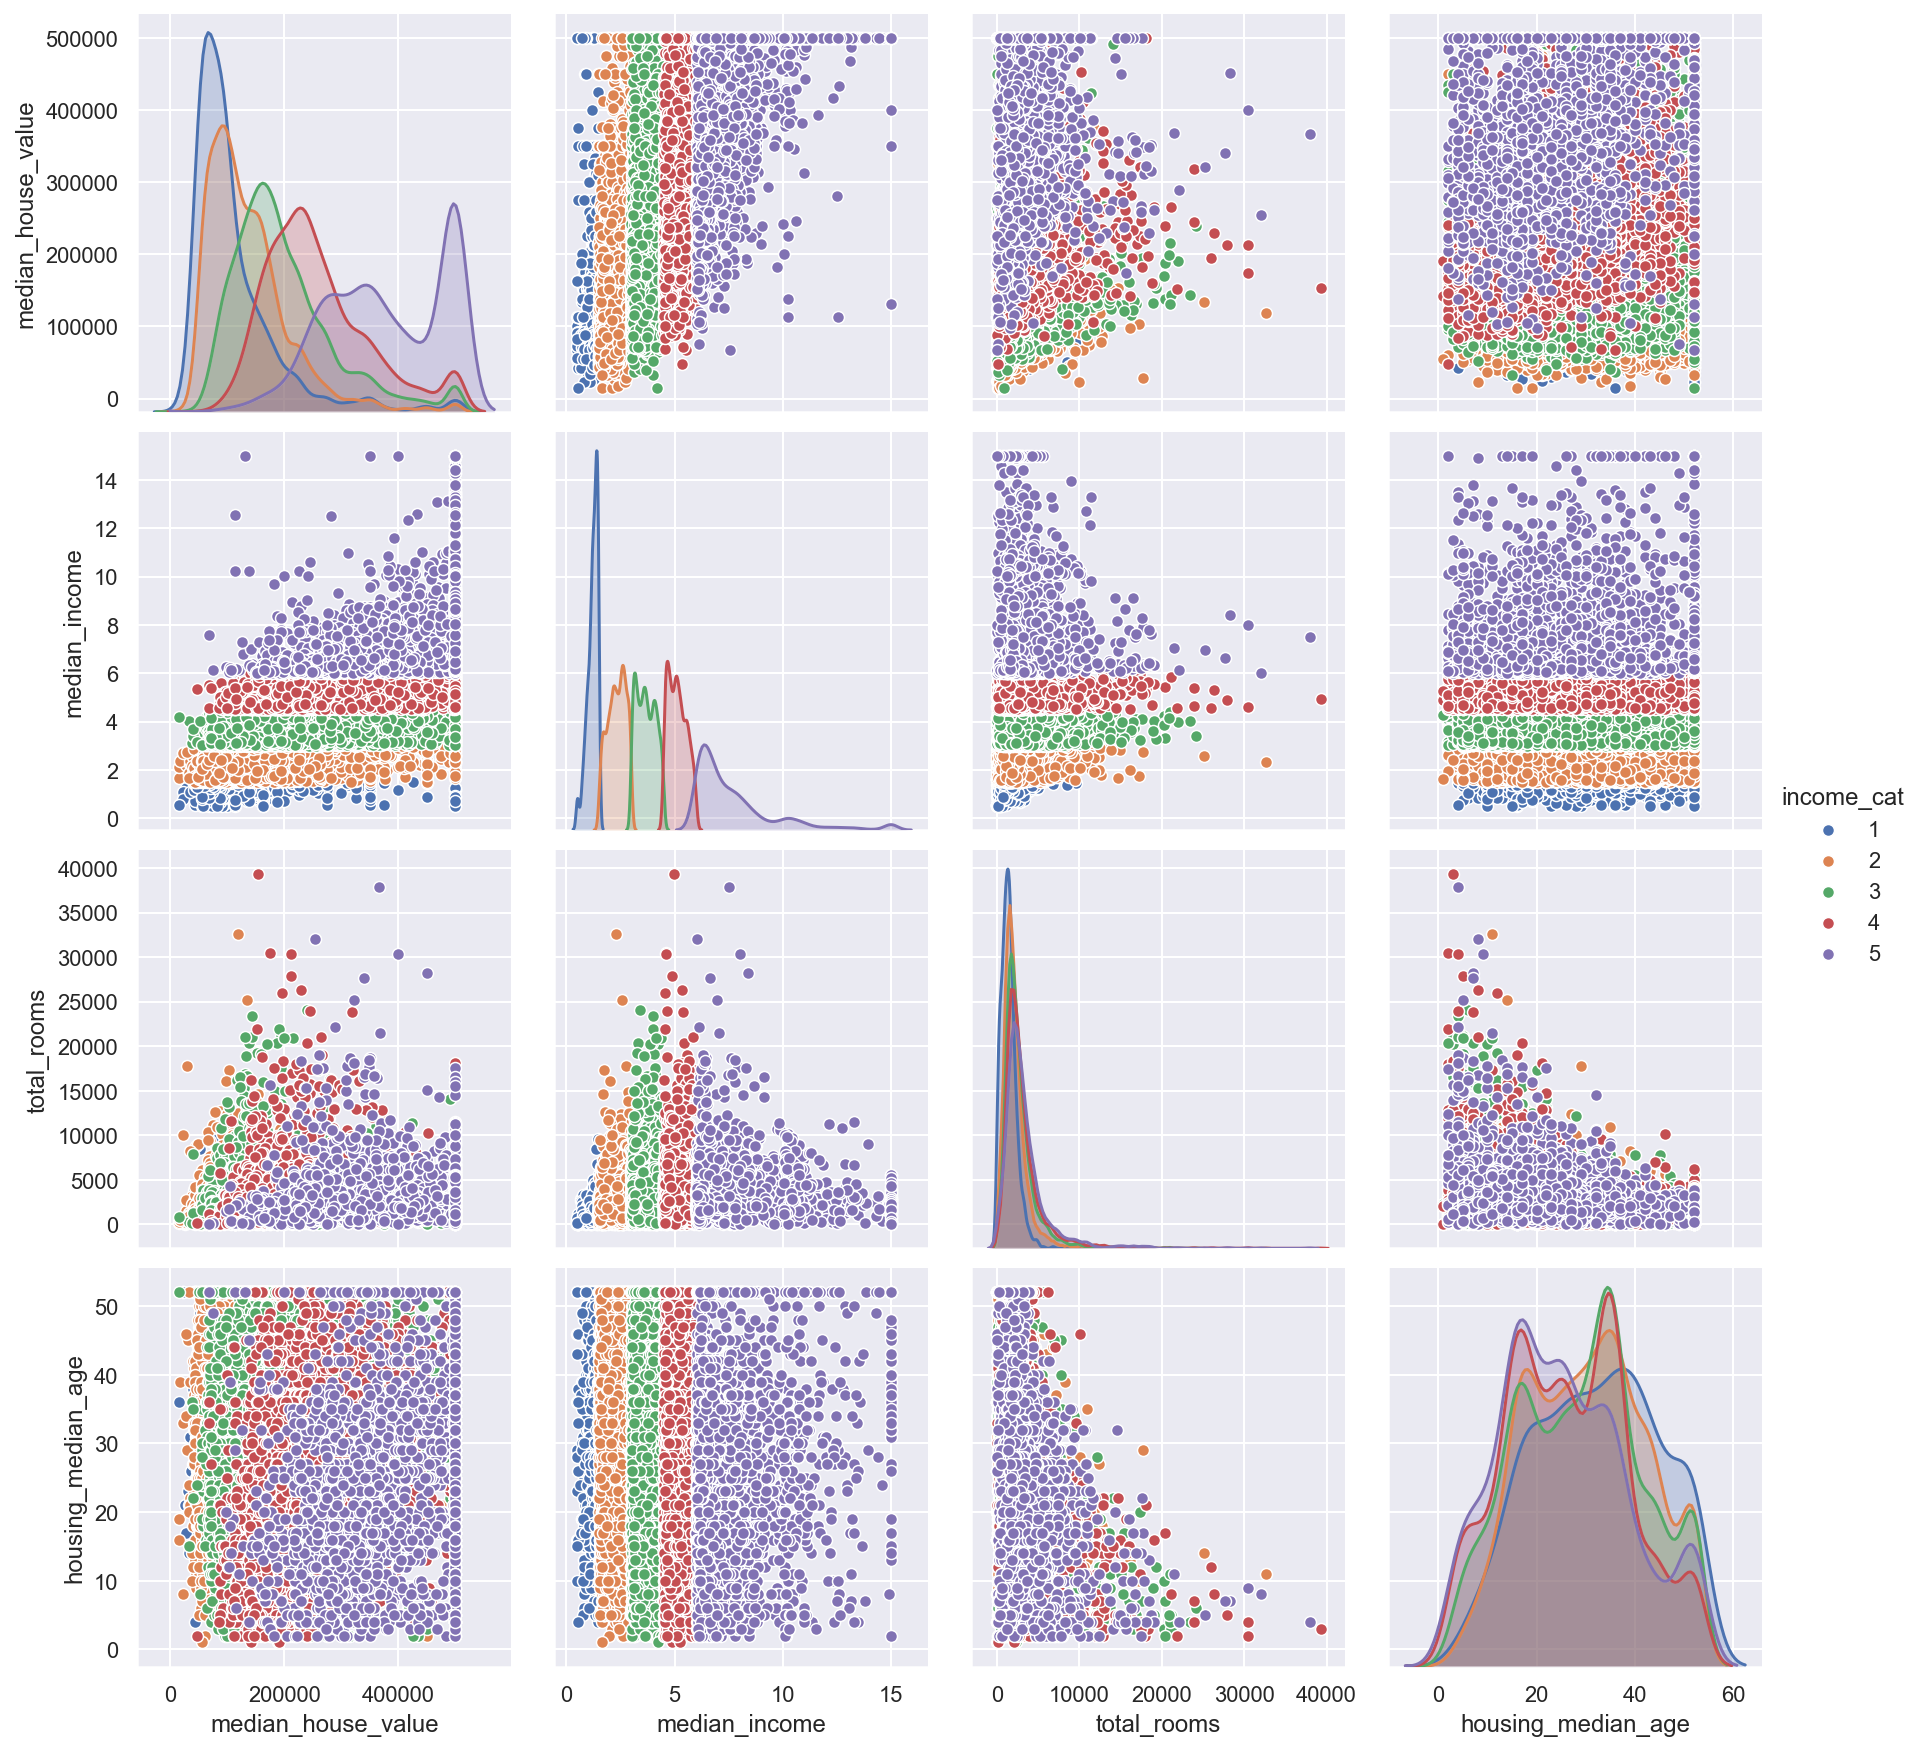

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "income_cat"]
sns.pairplot(data=df[attributes], hue='income_cat', height=3, aspect=1);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


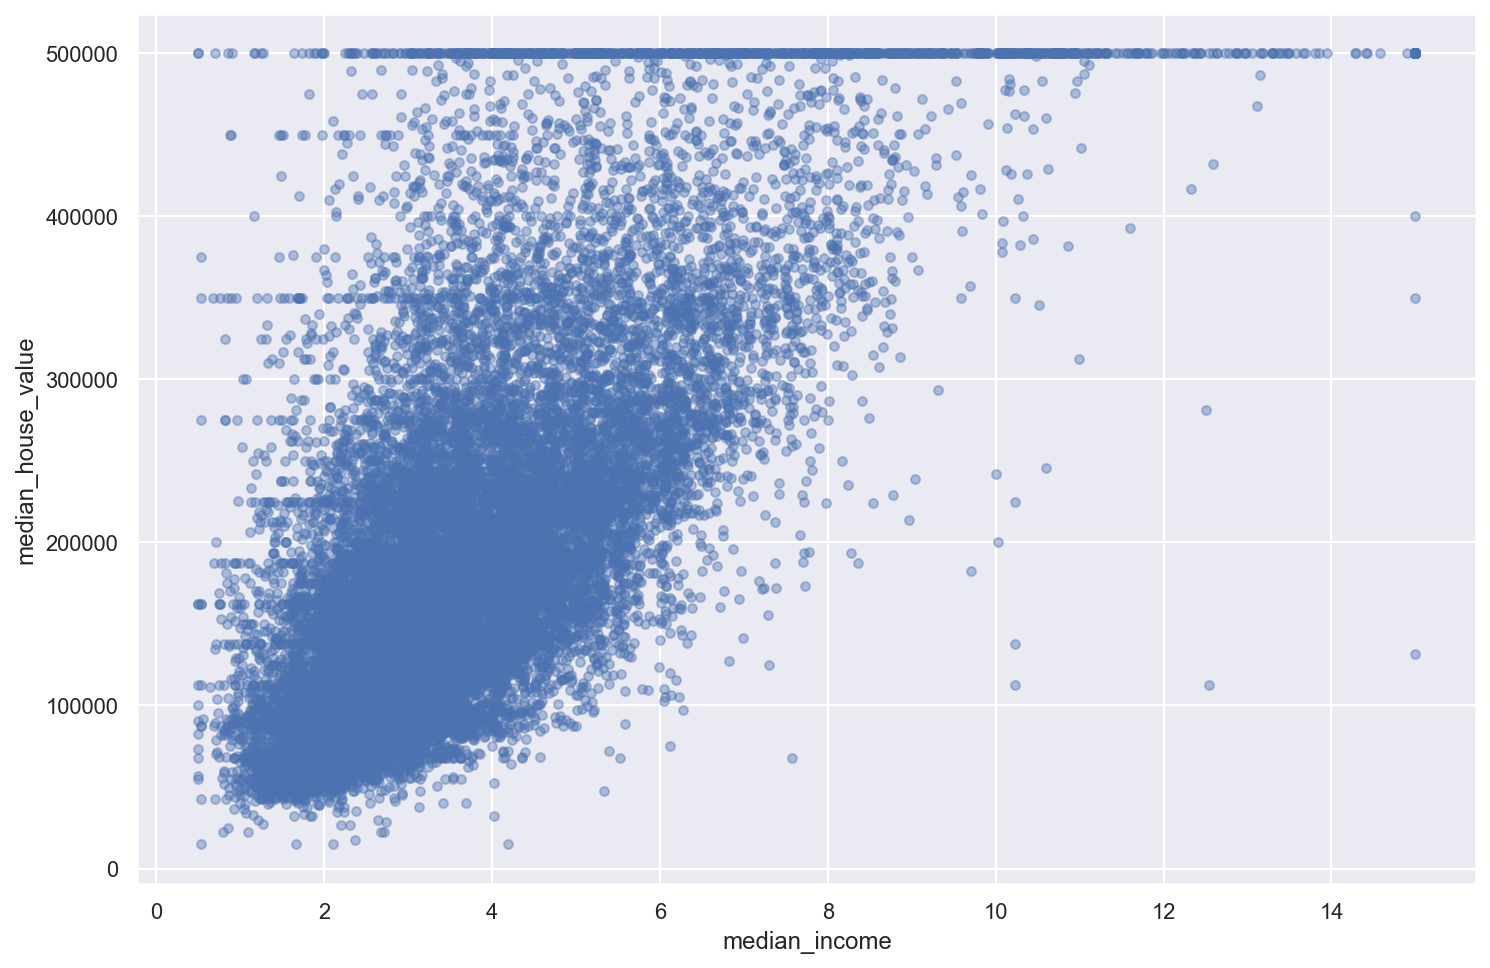

In [18]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4);

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(df, df["income_cat"]):
    strat_train_set = df.iloc[trainIndex]
    strat_test_set = df.iloc[testIndex]

### Arbol de decisión con un mínimo preprocesamiento de los datos

Hacemos una copy del dataset 

In [20]:
df_simple_rf = df.copy()

In [21]:
df_simple_rf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20433 rows x 11 columns]

convertimos la variable **ocean_proximity** a una variable categórica

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [23]:
variable_to_convert = df_simple_rf[["ocean_proximity"]]

In [24]:
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)

In [25]:
variable_converted

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [26]:
df_simple_rf["ocean_proximity"] = variable_converted

In [27]:
df_simple_rf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity income_cat  
0                  3.0          5  
1                  3.0          5  
2                  3.0          5  
3                  3.0          4  
4                  3.0          3  
...                ...        ...  
20635              1.0          2  
20636              1.0          2  
20637              1.0          2  
20638              1.0          2  
20639              1.0          2  

[20433 rows x 11 columns]

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(df_simple_rf, df_simple_rf["income_cat"]):
    rf_strat_train_set = df_simple_rf.iloc[trainIndex]
    rf_strat_test_set = df_simple_rf.iloc[testIndex]

Dividimos en Train y test con stratified

In [29]:
rf_strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18052    -121.98     37.25                19.0        755.0            93.0   
17555    -121.87     37.33                37.0       3137.0           685.0   
19195    -122.68     38.44                36.0       1311.0           259.0   
17808    -121.87     37.41                17.0       3719.0           588.0   
10265    -117.85     33.90                25.0       1548.0           256.0   
...          ...       ...                 ...          ...             ...   
17416    -120.46     34.65                22.0       1298.0           358.0   
2136     -119.73     36.80                24.0       1316.0           249.0   
7354     -118.15     33.96                33.0       1471.0           451.0   
11880    -117.39     33.98                37.0       2337.0           452.0   
9887     -122.29     38.30                52.0        935.0           224.0   

       population  households  median_income  median_house_value  \
18052       267.0        99.0        15.0000            500001.0   
17555      2048.0       651.0         3.0156            270300.0   
19195       648.0       268.0         3.4545            161200.0   
17808      2089.0       561.0         6.7867            273700.0   
10265       811.0       263.0         5.2037            242200.0   
...           ...         ...            ...                 ...   
17416      1272.0       363.0         1.6488            117500.0   
2136        781.0       260.0         3.7578             69200.0   
7354       2272.0       482.0         2.5385            160900.0   
11880       948.0       437.0         3.1450            169100.0   
9887        315.0       207.0         1.8287            146900.0   

       ocean_proximity income_cat  
18052              0.0          5  
17555              0.0          3  
19195              0.0          3  
17808              0.0          5  
10265              0.0          4  
...                ...        ...  
17416              4.0          2  
2136               1.0          3  
7354               0.0          2  
11880              1.0          3  
9887               3.0          2  

[16346 rows x 11 columns]

Separamos en x_train, y_train, x_test, y_test

In [30]:
x_columns = [ i for i in df_simple_rf.columns if i!='median_house_value']
x_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'income_cat']

In [31]:
x_train = rf_strat_train_set[x_columns]
x_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18052    -121.98     37.25                19.0        755.0            93.0   
17555    -121.87     37.33                37.0       3137.0           685.0   
19195    -122.68     38.44                36.0       1311.0           259.0   
17808    -121.87     37.41                17.0       3719.0           588.0   
10265    -117.85     33.90                25.0       1548.0           256.0   
...          ...       ...                 ...          ...             ...   
17416    -120.46     34.65                22.0       1298.0           358.0   
2136     -119.73     36.80                24.0       1316.0           249.0   
7354     -118.15     33.96                33.0       1471.0           451.0   
11880    -117.39     33.98                37.0       2337.0           452.0   
9887     -122.29     38.30                52.0        935.0           224.0   

       population  households  median_income  ocean_proximity income_cat  
18052       267.0        99.0        15.0000              0.0          5  
17555      2048.0       651.0         3.0156              0.0          3  
19195       648.0       268.0         3.4545              0.0          3  
17808      2089.0       561.0         6.7867              0.0          5  
10265       811.0       263.0         5.2037              0.0          4  
...           ...         ...            ...              ...        ...  
17416      1272.0       363.0         1.6488              4.0          2  
2136        781.0       260.0         3.7578              1.0          3  
7354       2272.0       482.0         2.5385              0.0          2  
11880       948.0       437.0         3.1450              1.0          3  
9887        315.0       207.0         1.8287              3.0          2  

[16346 rows x 10 columns]

In [32]:
y_train = rf_strat_train_set['median_house_value']
x_test = rf_strat_test_set[x_columns]
y_test = rf_strat_test_set["median_house_value"]

Entrenamos un **DecisionTreeRegressor** sin optimización de hiperparámetros

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_regressor.predict(x_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

70043.25012394045

In [35]:
import numpy as np

x = np.linspace(50,500000,1000,"-")

Text(0, 0.5, 'y test')

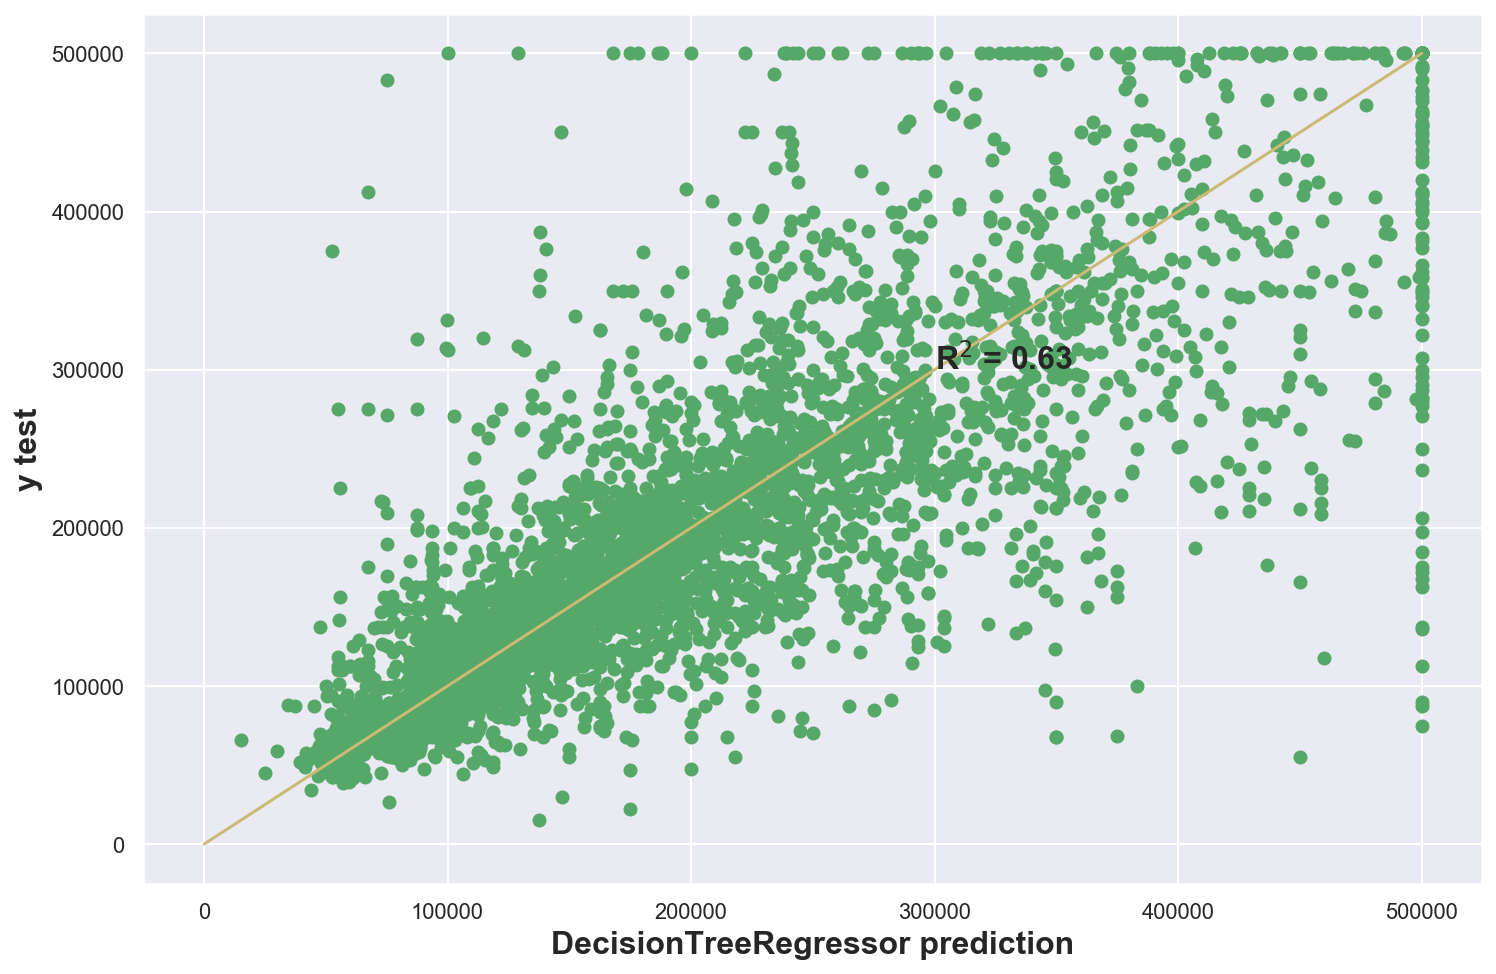

In [36]:
plt.plot(housing_predictions, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(tree_regressor.score(x_test, y_test)), fontsize=16, fontweight = 'bold' )
plt.xlabel("DecisionTreeRegressor prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')

Usando ahora un random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
housing_predictions_forest = forest_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, housing_predictions_forest)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

49569.57199270021

Text(0, 0.5, 'y test')

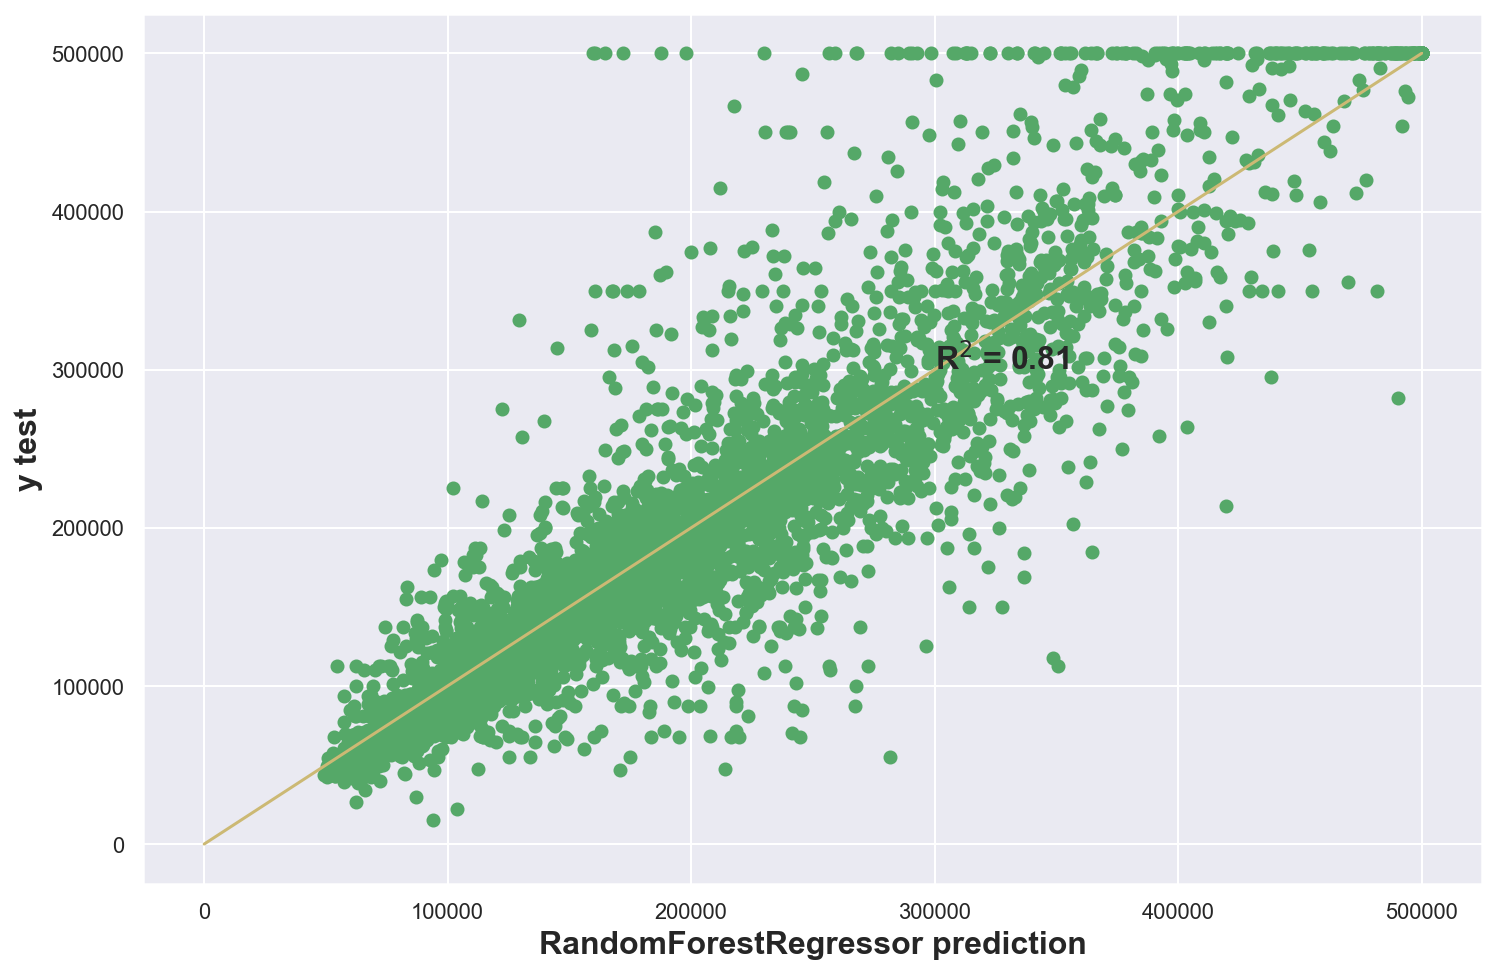

In [39]:
plt.plot(housing_predictions_forest, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(forest_reg.score(x_test, y_test)), fontsize=16, fontweight = 'bold' )
plt.xlabel("RandomForestRegressor prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')

## Preprocesamiento

In [18]:
for set in (strat_train_set, strat_test_set):
    set = set.drop("income_cat", axis=1)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [21]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

encoder = OneHotEncoder()
housing_cat_1_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [23]:
roomsIX, bedroomsIX, populationIX, householdsIX = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.addBedroomsPerRoom = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,roomsIX]/X[:,householdsIX]
        population_per_household = X[:,populationIX]/X[:,householdsIX]
        if self.addBedroomsPerRoom:
            bedrooms_per_room = X[:,bedroomsIX]/X[:,roomsIX]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [24]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

In [25]:
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                        ('cat_encoder', OneHotEncoder()),
                        ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline),])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape, housing_labels.shape)

(16512, 17) (16512,)


In [43]:
housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_test_labels = strat_test_set["median_house_value"].copy()

In [44]:
housing_test_prepared = full_pipeline.fit_transform(housing_test)

## Regresión lineal

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
linReg = LinearRegression()
linReg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
housing_predictions = linReg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459945

## Decision tree regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [43]:
display_scores(rmse_scores)

Scores: [69101.73871459 66902.80406084 71076.6574163  69986.63357226
 71294.43566758 74057.64853001 70459.38537081 72109.62508799
 77192.94780429 69720.54118086]
Mean: 71190.24174055386
Standard deviation: 2683.474155540596


In [45]:
lin_scores = cross_val_score(linReg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325577 66608.12026134 70575.91160151 74179.94794574
 67683.32226871 71103.16842496 64782.65898179 67711.29943408
 71080.40482867 67687.63855013]
Mean: 68828.99955527065
Standard deviation: 2662.7615683713666


## Random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18635.28189954635

In [51]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [52]:
display_scores(forest_rmse_scores)

Scores: [49704.60679796 47419.77357808 49695.02671074 52381.38565527
 50014.83247921 53542.28526539 48763.47122642 48041.58619289
 52958.91704722 50477.64128649]
Mean: 50299.95262396814
Standard deviation: 1962.2650268177567


In [47]:
forest_grid = RandomForestRegressor()

In [48]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [49]:
forest_regr = GridSearchCV(forest_grid, param_grid, cv=5, scoring='neg_mean_squared_error')

In [51]:
forest_regr.fit(housing_prepared.toarray(), housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
forest_regr.best_params_

{'max_features': 6, 'n_estimators': 30}

In [53]:
forest_regr.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
cv_results = forest_regr.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]): 
    print(np.sqrt(-mean_score), params)

63800.64625989534 {'max_features': 2, 'n_estimators': 3}
55943.08806907795 {'max_features': 2, 'n_estimators': 10}
53271.53512098287 {'max_features': 2, 'n_estimators': 30}
61549.2727661605 {'max_features': 4, 'n_estimators': 3}
53429.92715765761 {'max_features': 4, 'n_estimators': 10}
51353.9731680399 {'max_features': 4, 'n_estimators': 30}
60244.948439344465 {'max_features': 6, 'n_estimators': 3}
53395.71980415984 {'max_features': 6, 'n_estimators': 10}
50717.65795625341 {'max_features': 6, 'n_estimators': 30}
58964.768391155296 {'max_features': 8, 'n_estimators': 3}
52600.55530823935 {'max_features': 8, 'n_estimators': 10}
50874.29199961618 {'max_features': 8, 'n_estimators': 30}
62065.20241769296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55372.25165958349 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60564.0087826628 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53549.42005639894 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [56]:
pred_forest_grid = forest_regr.predict(housing_test_prepared.toarray())

In [57]:
np.sqrt(mean_squared_error(pred_forest_grid, housing_test_labels))

66244.40796235303

## SVR

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR()

In [55]:
svr.fit(housing_prepared.toarray(), housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
housing_predictions = svr.predict(housing_prepared.toarray())
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118455.13476469375

In [58]:
svr_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [111278.19965683 119407.30459841 116854.19841062 120327.97864229
 117498.68029855 122169.71157035 117531.7045561  121375.69566777
 120246.96373235 117894.32343717]
Mean: 118458.47605704253
Standard deviation: 2934.380691324086


In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10 ** 6]}

In [30]:
svr_grid = SVR()

In [31]:
regr = GridSearchCV(svr_grid, parameters, scoring='neg_mean_squared_error')

In [32]:
regr.fit(housing_prepared.toarray(), housing_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000000], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [36]:
housing_predictions = regr.predict(housing_prepared.toarray())
regr_mse = mean_squared_error(housing_labels, housing_predictions)
regr_rmse = np.sqrt(regr_mse)
regr_rmse

50663.78282457026

In [37]:
regr.best_params_

{'C': 1000000, 'kernel': 'rbf'}

In [38]:
results = regr.cv_results_

In [40]:
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)

108968.2694281854 {'C': 1, 'kernel': 'linear'}
118532.195275425 {'C': 1, 'kernel': 'rbf'}
70359.34851466323 {'C': 1000000, 'kernel': 'linear'}
55305.68203280173 {'C': 1000000, 'kernel': 'rbf'}


In [45]:
pred_grid = regr.predict(housing_test_prepared.toarray())

In [46]:
np.sqrt(mean_squared_error(pred_grid, housing_test_labels))

55680.106872018085